# Monthly Job Posting in India

In [65]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('D:\\python Programming\\DataSets\\data_jobs.csv')

**Performing Cleanup**

In [38]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

**Creating a new dataframe name df_India with job_country India only**

In [40]:
df_India = df[df['job_country'] == 'India'].copy()

**Adding a column with the name of the Month in it**

In [41]:
df_India['job_posted_month'] = pd.to_datetime(df['job_posted_date']).dt.strftime('%B')

**Creating a pivot Table with job_posted_month as Index and job_title_short as column** 

In [42]:
India_pivot = df_India.pivot_table(index = 'job_posted_month',columns='job_title_short',aggfunc='size')

In [43]:
India_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [44]:
India_pivot.reset_index(inplace = True)

In [45]:
India_pivot['month_no'] = pd.to_datetime(India_pivot['job_posted_month'],format = '%B').dt.month

In [46]:
India_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,170,32,418,1566,946,54,86,375,194,169,4
1,August,189,25,618,1407,1157,47,126,343,235,148,8
2,December,186,27,648,1464,1206,94,77,343,200,133,12
3,February,143,35,433,1631,932,42,94,313,165,157,2
4,January,175,31,628,2132,1444,70,127,448,269,192,1
5,July,142,25,457,1528,1123,54,75,359,204,155,7
6,June,146,26,367,1632,1129,41,66,427,238,125,6
7,March,116,37,422,1591,1005,34,96,351,194,180,3
8,May,103,14,278,1384,837,31,59,329,134,98,5
9,November,192,29,722,1743,1614,52,125,423,278,139,11


In [47]:
India_pivot = India_pivot.set_index('month_no')

In [48]:
India_pivot.sort_index(inplace=True)
India_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month_no,,,,,,,,,,,
1,January,175,31,628,2132,1444,70,127,448,269,192
2,February,143,35,433,1631,932,42,94,313,165,157
3,March,116,37,422,1591,1005,34,96,351,194,180
4,April,170,32,418,1566,946,54,86,375,194,169
5,May,103,14,278,1384,837,31,59,329,134,98
6,June,146,26,367,1632,1129,41,66,427,238,125
7,July,142,25,457,1528,1123,54,75,359,204,155
8,August,189,25,618,1407,1157,47,126,343,235,148
9,September,155,34,630,1508,984,67,85,324,195,132


In [49]:
India_pivot = India_pivot.set_index('job_posted_month')
India_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


In [ ]:
top3 = df_India['job_title_short'].value_counts().head(3)
top3 = top3.index.to_list()

['Data Engineer', 'Data Scientist', 'Data Analyst']

**Plotting the data**

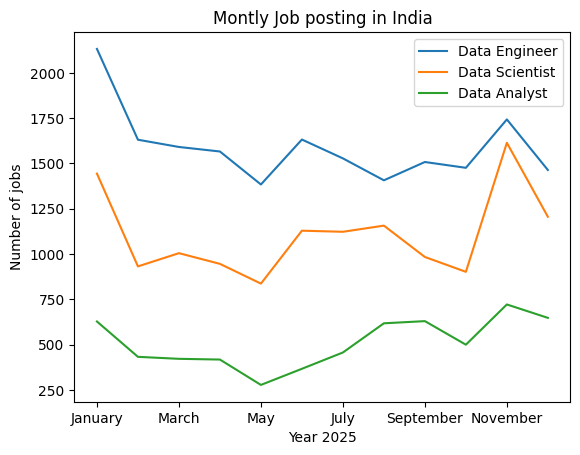

In [68]:
India_pivot[top3].plot(kind = 'line')
plt.title('Montly Job posting in India')
plt.xlabel('Year 2025')
plt.ylabel('Number of jobs')
plt.legend()
plt.show()